In [44]:
# Dependencies Import 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [45]:
#CSV Imports and check

WH20 = pd.read_csv('Clean_Data/World_Happiness_2020.csv')

WH19 = pd.read_csv('Clean_Data/World_Happiness_2019.csv')

WH18 = pd.read_csv('Clean_Data/World_Happiness_2018.csv')

WH17 = pd.read_csv('Clean_Data/World_Happiness_2017.csv')

WH16 = pd.read_csv('Clean_Data/World_Happiness_2016.csv')

WH15 = pd.read_csv('Clean_Data/World_Happiness_2015.csv')



,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [46]:
#For individual country, shorten dataframes to country and happiness score

WH201 = WH20[["Country","Ladder score"]].copy()

WH191 = WH19[["Country","Score"]].copy()

WH181 = WH18[["Country","Score"]].copy()

WH171 = WH17[["Country","Happiness.Score"]].copy()

WH161 = WH16[["Country","Happiness Score"]].copy()

WH151 = WH15[["Country","Happiness Score"]].copy()


In [47]:
#Merge all small dataframes into one big one, rename all score headers to the year they're from, and order

Big_df = WH201.merge(WH191, how = "inner", on="Country")
Big_df = Big_df.merge(WH181, how = "inner", on="Country")
Big_df = Big_df.merge(WH171, how = "inner", on="Country")
Big_df = Big_df.merge(WH161, how = "inner", on="Country")
Big_df = Big_df.merge(WH151, how = "inner", on="Country")
Big_df = Big_df.rename(columns={"Ladder score":"2020", "Score_x":"2019", "Score_y":"2018", "Happiness.Score":"2017", "Happiness Score_x":"2016", "Happiness Score_y":"2015"})
Big_df = Big_df[["Country","2015", "2016", "2017", "2018", "2019", "2020"]]
Big_df

,Country,2015,2016,2017,2018,2019,2020
0,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669
1,Albania,4.959,4.655,4.644,4.586,4.719,4.8827
2,Algeria,5.605,6.355,5.872,5.295,5.211,5.0051
3,Argentina,6.574,6.650,6.599,6.388,6.086,5.9747
4,Armenia,4.350,4.360,4.376,4.321,4.559,4.6768
...,...,...,...,...,...,...,...
138,Venezuela,6.810,6.084,5.250,4.806,4.707,5.0532
139,Vietnam,5.360,5.061,5.074,5.103,5.175,5.3535
140,Yemen,4.077,3.724,3.593,3.355,3.380,3.5274
141,Zambia,5.129,4.795,4.514,4.377,4.107,3.7594


In [48]:
#Build Machine learning for predictions

X = [[2015], [2016], [2017], [2018], [2019], [2020]]

y = []

y_int = []

slope = []

import random
for index, row in Big_df.iterrows():
    
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    y.append(row[1])
    y.append(row[2])
    y.append(row[3])
    y.append(row[4])
    y.append(row[5])
    y.append(row[6])
    
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    x_min = 2015
    x_max = 2020

    
    y_min_actual = min(y)
    y_max_actual = max(y)

    y_min = model.intercept_ + model.coef_ * x_min
    y_max = model.intercept_ + model.coef_ * x_max
    
    y_int.append(model.intercept_)
    slope.append(model.coef_)
    
    
    y=[]

In [57]:
#Calculate predictions based on equation from previous model calculation and create csv for visualization

predict_df = Big_df.copy()
predict_df['Y-Intercept'] = y_int
predict_df["Slope"] = slope

predict_df
predict_df["2021"] = predict_df["Y-Intercept"] + predict_df["Slope"]*2021
predict_df["2022"] = predict_df["Y-Intercept"] + predict_df["Slope"]*2022
predict_df["2023"] = predict_df["Y-Intercept"] + predict_df["Slope"]*2023
predict_df["2024"] = predict_df["Y-Intercept"] + predict_df["Slope"]*2024
predict_df["2025"] = predict_df["Y-Intercept"] + predict_df["Slope"]*2025
predict_df

predict_df["Difference"] = predict_df["2025"] - predict_df["2020"]
predict_df

predict_df.to_csv("Difference.csv")

In [8]:
#grabbing both region and happiness score for consolidation 

WH202 = WH20[["Country", "Regional indicator","Ladder score"]].copy()


WH192 = WH19[["Country","Score"]].copy()

WH182 = WH18[["Country","Score"]].copy()

WH172 = WH17[["Country","Happiness.Score"]].copy()

WH162 = WH16[["Country","Happiness Score"]].copy()

WH152 = WH15[["Country","Happiness Score"]].copy()

Big_df2 = WH202.merge(WH192, how = "inner", on="Country")
Big_df2 = Big_df2.merge(WH182, how = "inner", on="Country")
Big_df2 = Big_df2.merge(WH172, how = "inner", on="Country")
Big_df2 = Big_df2.merge(WH162, how = "inner", on="Country")
Big_df2 = Big_df2.merge(WH152, how = "inner", on="Country")
Big_df2 = Big_df2.rename(columns={"Ladder score":"2020", "Score_x":"2019", "Score_y":"2018", "Happiness.Score":"2017", "Happiness Score_x":"2016", "Happiness Score_y":"2015"})
Big_df2 = Big_df2[["Country","2015", "2016", "2017", "2018", "2019", "2020"]]

Big_df2 = Big_df2.merge(WH202, how="left", on = "Country")
Big_df2 = Big_df2[["Regional indicator", "2015", "2016", "2017", "2018", "2019", "2020"]]
Big_df2 = Big_df2.groupby(["Regional indicator"]).mean()
Big_df2

,2015,2016,2017,2018,2019,2020
Regional indicator,,,,,,
Central and Eastern Europe,5.365824,5.424882,5.521706,5.629706,5.776941,5.883818
Commonwealth of Independent States,5.286333,5.293917,5.251583,5.229167,5.256333,5.358342
East Asia,5.626167,5.624167,5.646667,5.672000,5.688833,5.714850
Latin America and Caribbean,6.138762,6.056095,5.957905,5.949857,5.954429,5.981786
Middle East and North Africa,5.392235,5.464176,5.422765,5.325647,5.274529,5.227159
North America and ANZ,7.279000,7.288750,7.226750,7.202500,7.176250,7.173525
South Asia,4.468833,4.457833,4.564667,4.524167,4.434333,4.355083
Southeast Asia,5.372625,5.396750,5.444875,5.399750,5.333375,5.445213
Sub-Saharan Africa,4.120419,4.074839,4.131129,4.247968,4.380323,4.466742


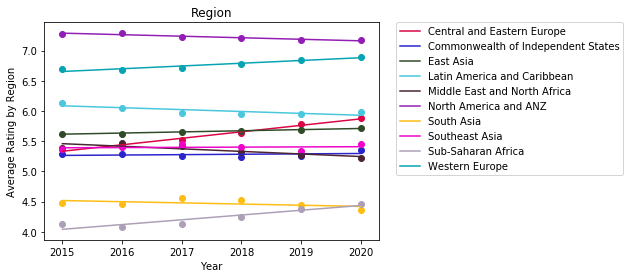

In [12]:
#Using machine learning to create predictions per region

X = [[2015], [2016], [2017], [2018], [2019], [2020]]

y = []

rslope = []

ryint = []

Region = Big_df2.index

import random
for index, row in Big_df2.iterrows():
    
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    y.append(row[0])
    y.append(row[1])
    y.append(row[2])
    y.append(row[3])
    y.append(row[4])
    y.append(row[5])
    
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    x_min = 2015
    x_max = 2020

    
    y_min_actual = min(y)
    y_max_actual = max(y)

    y_min = model.intercept_ + model.coef_ * x_min
    y_max = model.intercept_ + model.coef_ * x_max
    
    plt.scatter(x=X, y=y, color=color, label = color)
    plt.plot([x_min, x_max], [y_min, y_max], c=color)
    y=[]
    ryint.append(model.intercept_)
    rslope.append(model.coef_)
    
plt.title('Region')
plt.xlabel('Year')
plt.ylabel('Average Rating by Region')
plt.legend(Region, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
    


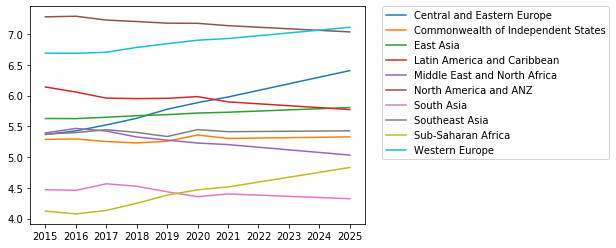

In [38]:
#Making and graphing predictions for 2021-2025

Big_df2['Slope'] = rslope
Big_df2['Y-int']=ryint

Big_df2["2025"] = Big_df2["Y-int"] + Big_df2["Slope"]*2025
Big_df2["2021"] = Big_df2["Y-int"] + Big_df2["Slope"]*2021
Big_df2["2022"] = Big_df2["Y-int"] + Big_df2["Slope"]*2022
Big_df2["2023"] = Big_df2["Y-int"] + Big_df2["Slope"]*2023
Big_df2["2024"] = Big_df2["Y-int"] + Big_df2["Slope"]*2024


Big_df2

regionPlot_df=Big_df2[["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"]].copy()


regionPlotT_df = regionPlot_df.T
regionPlotT_df

plt.plot(regionPlotT_df.index, regionPlotT_df["Central and Eastern Europe"])
plt.plot(regionPlotT_df.index, regionPlotT_df["Commonwealth of Independent States"])
plt.plot(regionPlotT_df.index, regionPlotT_df["East Asia"])
plt.plot(regionPlotT_df.index, regionPlotT_df["Latin America and Caribbean"])
plt.plot(regionPlotT_df.index, regionPlotT_df["Middle East and North Africa"])
plt.plot(regionPlotT_df.index, regionPlotT_df["North America and ANZ"])
plt.plot(regionPlotT_df.index, regionPlotT_df["South Asia"])
plt.plot(regionPlotT_df.index, regionPlotT_df["Southeast Asia"])
plt.plot(regionPlotT_df.index, regionPlotT_df["Sub-Saharan Africa"])
plt.plot(regionPlotT_df.index, regionPlotT_df["Western Europe"])

plt.legend(Region, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()